In [1]:
from branching_model import Phylogeny

phylogeny = Phylogeny.Phylogeny(
    is_cell=False,
    learning_rate=0.01,
    baseline_growth_rate=0.05,
    resistance_cost=0.5,
    resistance_benefit=1.0,
    mutations_per_division=0.1,
)
detection_cell_count = 5000
n_timesteps_treatment = 100
phylogeny.run_simulation(detection_cell_count, n_timesteps_treatment)

growth rates: 0.01633870303630829 ± 0.0
growth rates: 0.01651141047477722 ± 0.0
growth rates: 0.016685551404953005 ± 0.0
growth rates: 0.016861146688461306 ± 0.0
growth rates: 0.017038196325302124 ± 0.0
growth rates: 0.01721671223640442 ± 0.0
growth rates: 0.017396700382232667 ± 0.0
growth rates: 0.017578166723251343 ± 0.0
growth rates: 0.01776111721992493 ± 0.0
growth rates: 0.017945560812950134 ± 0.0
growth rates: 0.018131497502326965 ± 0.0
growth rates: 0.018318948149681092 ± 0.0
growth rates: 0.01850789785385132 ± 0.0
growth rates: 0.018698376417160035 ± 0.0
growth rates: 0.018890368938446048 ± 0.0
growth rates: 0.01786809116601944 ± 0.0012157931923866272
growth rates: 0.020570388436317446 ± 0.0012914568185806267
growth rates: 0.023139341175556185 ± 0.0036638304591178894
growth rates: 0.03340301737189293 ± 0.012137374648116026
growth rates: 0.028470012452453373 ± 0.01510002102075774
growth rates: 0.023794230632483964 ± 0.014457888931631089
growth rates: 0.025495194823348104 ± 0.013

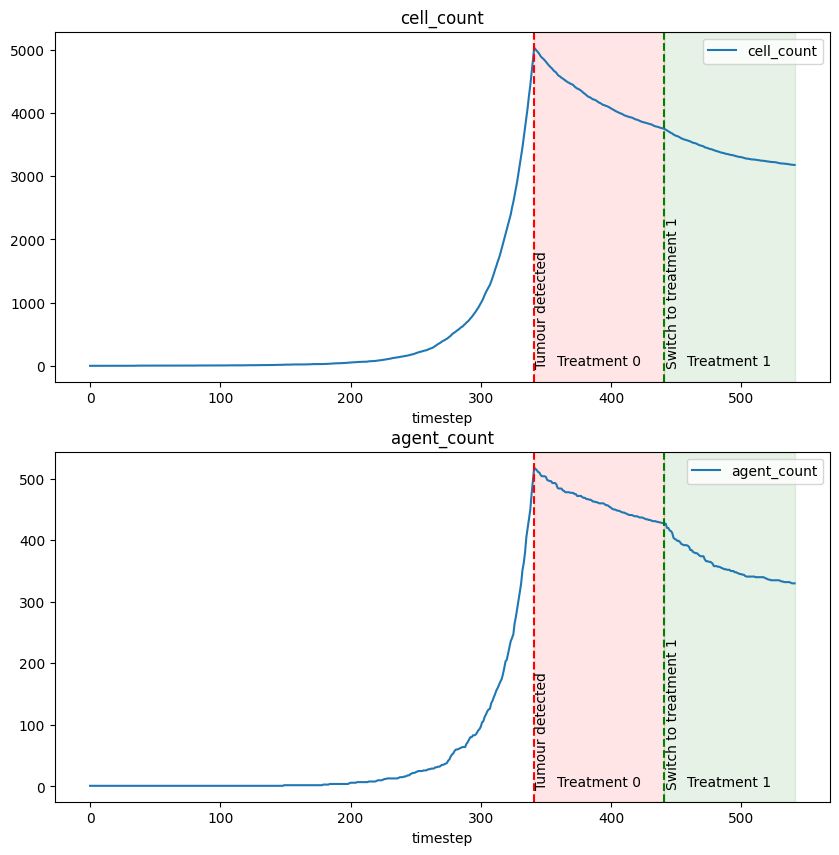

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

cell_counts = pd.read_csv("logs/cell_counts.csv")
time_reached_detection = cell_counts[
    cell_counts["cell_count"] >= detection_cell_count
].iloc[0]["timestep"]
# plot the cell counts against time
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
for ax, column in zip(axes, ["cell_count", "agent_count"]):
    cell_counts.plot(x="timestep", y=column, title=column, ax=ax)
    ax.axvline(x=time_reached_detection, color="red", linestyle="--")
    ax.text(time_reached_detection + 1, 0, "Tumour detected", rotation=90)
    ax.axvline(
        x=time_reached_detection + n_timesteps_treatment,
        color="green",
        linestyle="--",
        label="Switch to treatment 1",
    )
    ax.text(
        time_reached_detection + n_timesteps_treatment + 1,
        0,
        "Switch to treatment 1",
        rotation=90,
    )
    ax.text(
        time_reached_detection + n_timesteps_treatment / 2,
        0,
        "Treatment 0",
        ha="center",
    )
    ax.text(
        time_reached_detection + n_timesteps_treatment + n_timesteps_treatment / 2,
        0,
        "Treatment 1",
        ha="center",
    )
    ylim = ax.get_ylim()
    ax.fill_betweenx(
        ylim,
        time_reached_detection,
        time_reached_detection + n_timesteps_treatment,
        alpha=0.1,
        color="red",
    )
    ax.fill_betweenx(
        ylim,
        time_reached_detection + n_timesteps_treatment,
        time_reached_detection + n_timesteps_treatment * 2,
        alpha=0.1,
        color="green",
    )
    ax.set_ylim(ylim)

In [3]:
cell_counts

timestep  cell_count  agent_count
0           0           1            1
1           1           1            1
2           2           1            1
3           3           1            1
4           4           1            1
..        ...         ...          ...
537       537        3190          332
538       538        3185          331
539       539        3183          330
540       540        3182          330
541       541        3179          330

[542 rows x 3 columns]

In [4]:
cell_phenotypes = pd.read_csv("logs/cell_phenotypes.csv")
cell_phenotypes

timestep  agent_id  n_cells  susceptible   resistant_0   resistant_1
0             0         0        1     0.326774  3.359185e-01  3.373074e-01
1             1         0        1     0.327118  3.357601e-01  3.371216e-01
2             2         0        1     0.327463  3.356017e-01  3.369357e-01
3             3         0        1     0.327807  3.354430e-01  3.367497e-01
4             4         0        1     0.328152  3.352843e-01  3.365635e-01
...         ...       ...      ...          ...           ...           ...
95735       541       511        1     0.719982  5.498730e-02  2.250307e-01
95736       541       512        1     0.004826  4.896251e-03  9.902782e-01
95737       541       513        1     0.999997  8.107844e-22  2.767748e-06
95738       541       515        2     1.000000  2.722583e-19  1.416023e-20
95739       541       516        1     0.016502  2.349824e-03  9.811478e-01

[95740 rows x 6 columns]

MovieWriter imagemagick unavailable; using Pillow instead.


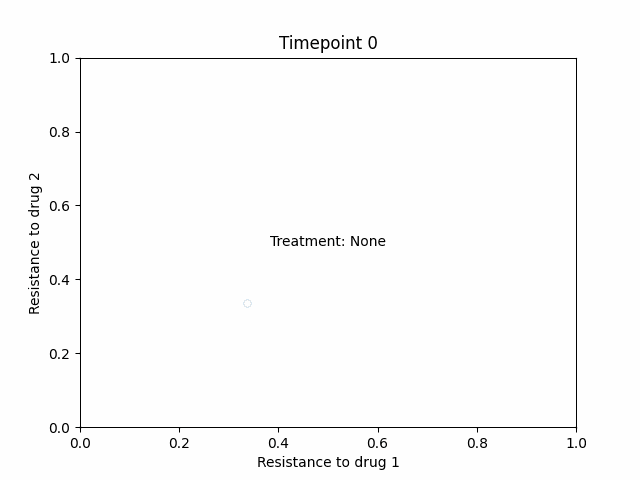

In [15]:
# animated scatter plot of resistant_0 against resistant_1 at each timepoint
import matplotlib.animation as animation
import matplotlib.colors as mcolors

fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

treatments_by_timepoint = [
    (
        None
        if timestep < time_reached_detection
        else 1
        if timestep < time_reached_detection + n_timesteps_treatment
        else 2
    )
    for timestep in cell_phenotypes["timestep"].unique()
]
baseline_alpha = 0.1


def update(timepoint: int):
    ax.clear()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"Timepoint {timepoint}")
    ax.scatter(
        cell_phenotypes[cell_phenotypes["timestep"] == timepoint]["resistant_0"],
        cell_phenotypes[cell_phenotypes["timestep"] == timepoint]["resistant_1"],
        alpha=(
            baseline_alpha
            + cell_phenotypes[cell_phenotypes["timestep"] == timepoint]["n_cells"]
            / max_n_cells
            * (1 - baseline_alpha)
        ),
    )
    ax.set_xlabel("Resistance to drug 1")
    ax.set_ylabel("Resistance to drug 2")
    ax.text(
        0.5,
        0.5,
        f"Treatment: {treatments_by_timepoint[timepoint]}",
        ha="center",
        va="center",
    )


ani = animation.FuncAnimation(fig, update, frames=cell_phenotypes["timestep"].unique())
ani.save("tests/cell_phenotypes.gif", writer="imagemagick", fps=10)
plt.close()
# show the gif
from IPython.display import Image

Image("tests/cell_phenotypes.gif")